In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import sklearn.metrics as metrics

In [2]:
with open('../../outputs/cr_investigations/pt600_akt04_regmass_argmin.pkl', 'rb') as f:
    cring = pickle.load(f)

In [3]:
hgg = cring[0]['Hgg']['Hgg']
hbb = cring[0]['Hbb']['Hbb']

In [4]:
#signal scale factors
scalesHJ = ((44.99*(0.471*1000)*0.0817)/(hgg['entries']))
scalesHbb = ((44.99*(0.274*1000)*0.581)/(hbb['entries']))

In [5]:
#do the scaling 
hgg_entries = list(hgg.keys())
for i in range(1, len(hgg_entries)):
    hgg[hgg_entries[i]].view(flow=True)[:] *= scalesHJ

hbb_entries = list(hgg.keys())
for i in range(1, len(hbb_entries)):
    hbb[hbb_entries[i]].view(flow=True)[:] *= scalesHbb

In [6]:
#get the totals for each histogram
hgg_totals_dict = {}
for i in range(1, len(hgg_entries)):
    hgg_totals_dict[hgg_entries[i]] = hgg[hgg_entries[i]][0:len(hgg[hgg_entries[i]].view()):sum]

hbb_totals_dict = {}
for i in range(1, len(hbb_entries)):
    hbb_totals_dict[hbb_entries[i]] = hbb[hbb_entries[i]][0:len(hbb[hbb_entries[i]].view()):sum]

In [7]:
#get the true positive fractions
hgg_truth_dict = {}
for i in range(1, len(hgg_entries)):
    temp_list = []
    for j in range(1, len(hgg[hgg_entries[i]].view())+1):
        temp_list.append(hgg[hgg_entries[i]][0:j:sum].value/hgg_totals_dict[hgg_entries[i]].value)
    hgg_truth_dict[hgg_entries[i]] = temp_list

hbb_truth_dict = {}
for i in range(1, len(hbb_entries)):
    temp_list = []
    for j in range(1, len(hbb[hbb_entries[i]].view())+1):
        temp_list.append(hbb[hbb_entries[i]][0:j:sum].value/hbb_totals_dict[hbb_entries[i]].value)
    hbb_truth_dict[hbb_entries[i]] = temp_list

In [8]:
#2017 integrated luminosity and QCD cross sections
IL = 44.99
xs_170to300 = 103700
xs_300to470 = 6835
xs_470to600 = 549.5
xs_600to800 = 156.5
xs_800to1000 = 26.22
xs_1000to1400 = 7.475
xs_1400to1800 = 0.6482
xs_1800to2400 = 0.08742
xs_2400to3200 = 0.005237
xs_3200toInf = 0.0001353

In [9]:
#combine the qcds into a dictionary
qcd_dict = {}
qcd_dict['q173'] = cring[0]['QCD_Pt_170to300_TuneCP5_13TeV_pythia8']['QCD_Pt_170to300']
qcd_dict['q347'] = cring[0]['QCD_Pt_300to470_TuneCP5_13TeV_pythia8']['QCD_Pt_300to470']
qcd_dict['q476'] = cring[0]['QCD_Pt_470to600_TuneCP5_13TeV_pythia8']['QCD_Pt_470to600']
qcd_dict['q68'] = cring[0]['QCD_Pt_600to800_TuneCP5_13TeV_pythia8']['QCD_Pt_600to800']
qcd_dict['q810'] = cring[0]['QCD_Pt_800to1000_TuneCP5_13TeV_pythia8']['QCD_Pt_800to1000']
qcd_dict['q1014'] = cring[0]['QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8']['QCD_Pt_1000to1400']
qcd_dict['q1418'] = cring[0]['QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8']['QCD_Pt_1400to1800']
qcd_dict['q1824'] = cring[0]['QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8']['QCD_Pt_1800to2400']
qcd_dict['q2432'] = cring[0]['QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8']['QCD_Pt_2400to3200']
qcd_dict['q32inf'] = cring[0]['QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8']['QCD_Pt_3200toInf']

In [10]:
#QCD scale factors dictionary
qcd_sf_dict = {}
qcd_sf_dict['scales170to300'] = (((xs_170to300*1000)*IL)/(qcd_dict['q173']['entries']))
qcd_sf_dict['scales300to470'] = (((xs_300to470*1000)*IL)/(qcd_dict['q347']['entries']))
qcd_sf_dict['scales470to600'] = (((xs_470to600*1000)*IL)/(qcd_dict['q476']['entries']))
qcd_sf_dict['scales600to800'] = (((xs_600to800*1000)*IL)/(qcd_dict['q68']['entries']))
qcd_sf_dict['scales800to1000'] = (((xs_800to1000*1000)*IL)/(qcd_dict['q810']['entries']))
qcd_sf_dict['scales1000to1400'] = (((xs_1000to1400*1000)*IL)/(qcd_dict['q1014']['entries']))
qcd_sf_dict['scales1400to1800'] = (((xs_1400to1800*1000)*IL)/(qcd_dict['q1418']['entries']))
qcd_sf_dict['scales1800to2400'] = (((xs_1800to2400*1000)*IL)/(qcd_dict['q1824']['entries']))
qcd_sf_dict['scales2400to3200'] = (((xs_2400to3200*1000)*IL)/(qcd_dict['q2432']['entries']))
qcd_sf_dict['scales3200toInf'] = (((xs_3200toInf*1000)*IL)/(qcd_dict['q32inf']['entries']))

In [11]:
#scale all the qcd values
entries = list(qcd_dict['q173'].keys())
for i in range(0, len(qcd_dict)):
    qcd_range = list(qcd_dict.keys())[i]
    qcd_scales = list(qcd_sf_dict.keys())[i]
    for j in range(1, len(entries)):
        qcd_dict[qcd_range][entries[j]].view(flow=True)[:] *= qcd_sf_dict[qcd_scales]

In [12]:
#combine the qcds into individual variable fields
qcd_vars = {}
for i in range(1, len(entries)):
    temp_hist = qcd_dict['q173'][entries[i]]
    for j in range(1, len(qcd_dict)):
        temp_hist += qcd_dict[list(qcd_dict.keys())[j]][entries[i]]
    qcd_vars[entries[i]] = temp_hist

In [13]:
#totals for each qcd hist
qcd_totals_dict = {}
for i in range(1, len(entries)):
    qcd_totals_dict[entries[i]] = qcd_vars[entries[i]][0:len(qcd_vars[entries[i]].view()):sum]

In [14]:
#false positive fractions for each qcd variable
qcd_false_positive_dict = {}
for i in range(1, len(entries)):
    temp_list = []
    for j in range(1, len(qcd_vars[entries[i]].view())+1):
        temp_list.append(qcd_vars[entries[i]][0:j:sum].value/qcd_totals_dict[entries[i]].value)
    qcd_false_positive_dict[entries[i]] = temp_list

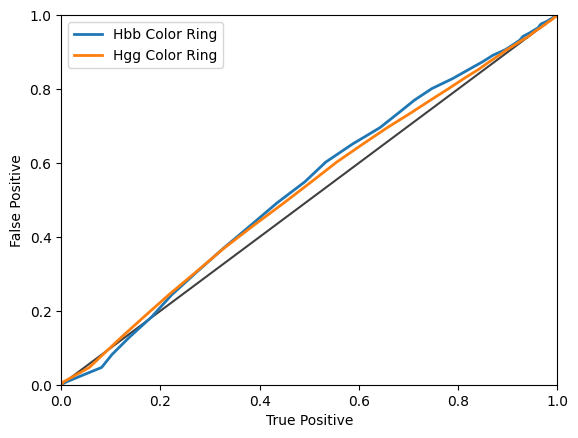

In [15]:
fig, ax = plt.subplots()

ax.plot(hbb_truth_dict['Color_Ring'], qcd_false_positive_dict['Color_Ring'], linewidth=2.0, label='Hbb Color Ring')
ax.plot(hgg_truth_dict['Color_Ring'], qcd_false_positive_dict['Color_Ring'], linewidth=2.0, label='Hgg Color Ring')
#ax.plot(hgg_truth_dict['D2'], qcd_false_positive_dict['D2'], linewidth=2.0, label='Hgg D2')
#ax.plot(hbb_truth_dict['D2'], qcd_false_positive_dict['D2'], linewidth=2.0, label='Hbb D2')

plt.xlabel("True Positive")
plt.ylabel("False Positive")
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()

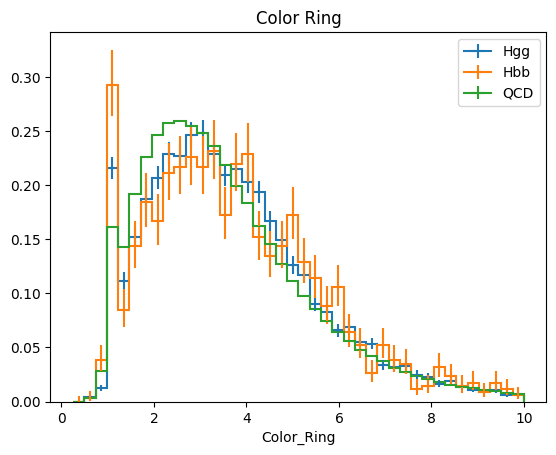

In [16]:
fig, ax = plt.subplots()
hgg['Color_Ring'].plot1d(ax=ax, label='Hgg', density=True)
hbb['Color_Ring'].plot1d(ax=ax, label='Hbb', density=True)
qcd_vars['Color_Ring'].plot1d(ax=ax, label='QCD', density=True)
ax.set_title('Color Ring')

# plt.yscale('log')
# plt.xscale('log')
# plt.xlim(125,5000)


plt.legend()

In [17]:
hbb_auc_dict = {}
for i in range(1, len(hbb_entries)):
    hbb_auc_dict[hgg_entries[i]] = metrics.auc(
                                        hbb_truth_dict[hbb_entries[i]],
                                        qcd_false_positive_dict[hbb_entries[i]]
                                    )
for i in range(1, len(hbb_entries)):
    if hbb_auc_dict[hbb_entries[i]] >= 0.5:
        hbb_auc_dict[hbb_entries[i]] = 1 - hbb_auc_dict[hbb_entries[i]]

In [18]:
hgg_auc_dict = {}
for i in range(1, len(hgg_entries)):
    hgg_auc_dict[hgg_entries[i]] = metrics.auc(
                                        hgg_truth_dict[hgg_entries[i]],
                                        qcd_false_positive_dict[hgg_entries[i]]
                                    )
for i in range(1, len(hgg_entries)):
    if hgg_auc_dict[hgg_entries[i]] >= 0.5:
        hgg_auc_dict[hgg_entries[i]] = 1 - hgg_auc_dict[hgg_entries[i]]

In [19]:
hbb_auc_dict

{'Color_Ring': 0.4694620756180726}

In [20]:
hgg_auc_dict

{'Color_Ring': 0.4751919824487397}

In [21]:
hgg['Color_Ring'][::sum]

WeightedSum(value=6.00559, variance=0.00434596)

In [22]:
hbb['Color_Ring'][::sum]

WeightedSum(value=20.1894, variance=0.290945)

In [23]:
qcd_vars['Color_Ring'][::sum]

WeightedSum(value=3.19561e+06, variance=8.02842e+06)